In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.layers import Flatten, Dense

In [5]:
# loading the data from keras.datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
# shape of the dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


3


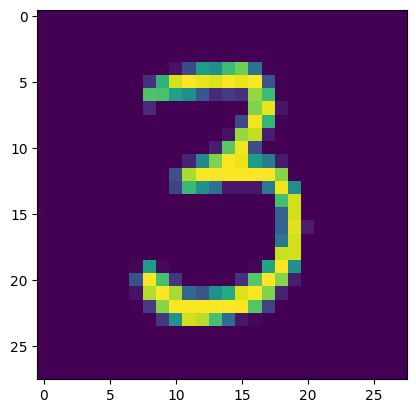

In [8]:
# Displaying an image and their corresponding variable 
plt.imshow(X_train[50])
plt.show 

print(y_train[50])

In [9]:
# scaling the values 
X_train = X_train/255
X_test = X_test/255

In [13]:
# Building the Neural Network
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(50, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

c:\Users\Lenovo\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 898us/step - accuracy: 0.8557 - loss: 0.4985
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.9564 - loss: 0.1456
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.9683 - loss: 0.1038
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.9749 - loss: 0.0791
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.9796 - loss: 0.0628
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.9850 - loss: 0.0505
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.9868 - loss: 0.0425
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.9897 - loss: 0.0342
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9893 - loss: 0.0323
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.9908 - loss: 0.0287
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.9911 - loss: 0.0283
Epoch 12

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.9683 - loss: 0.1801
0.972100019454956


In [18]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step


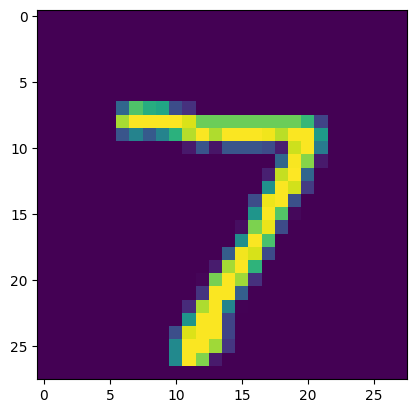

[2.3947774e-05 9.3307886e-09 1.3742362e-03 8.9612132e-01 1.4360554e-12
 4.0004306e-08 2.4241867e-19 1.0000000e+00 9.1480330e-04 9.8908657e-01]


In [21]:
plt.imshow(X_test[0])
plt.show()

print(y_pred[0])

In [22]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 4, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Text(0.5, 47.7222222222222, 'Predicted Labels')

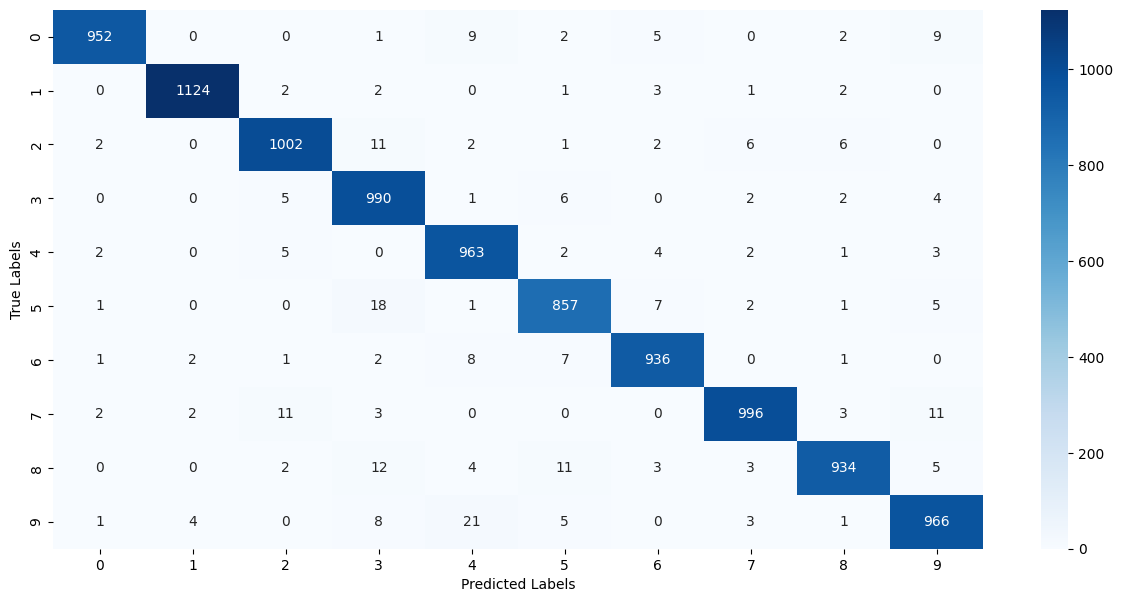

In [23]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

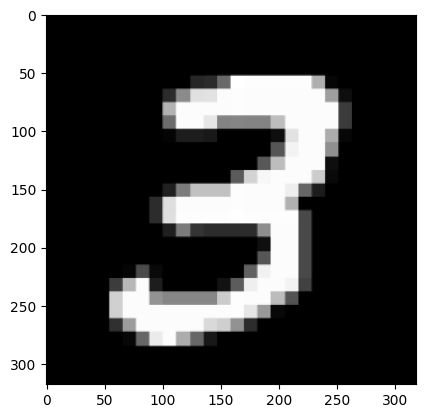

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The Handwritten Digit is recognised as  3


In [47]:
# Building a Predictive System 
input_image_path = 'D:\Rishabh\coding\Deep Learning Projects\MNIST Digit Classification\MNIST_digit.png'
input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

In [48]:
print(input_prediction)

[[1.5550083e-26 2.7463708e-12 4.4782865e-16 1.0000000e+00 2.8246290e-28
  2.5972815e-02 3.9069008e-36 2.4116154e-11 1.6580838e-08 1.4829139e-01]]
